In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Importing all the Datasets.

In [2]:
df_date = pd.read_csv(r"D:\AtliQ Grands\Input Files\dim_date.csv")
df_hotels = pd.read_csv(r"D:\AtliQ Grands\Input Files\dim_hotels.csv")
df_rooms = pd.read_csv(r"D:\AtliQ Grands\Input Files\dim_rooms.csv")
df_aggregated_bookings = pd.read_csv(r"D:\AtliQ Grands\Input Files\fact_aggregated_bookings.csv")
df_bookings = pd.read_csv(r"D:\AtliQ Grands\Input Files\fact_bookings.csv")

# Exploring the Datasets.

In [3]:
df_date.head()

,date,mmm yy,week no,day_type
0,1-May-22,22-May,W 19,weekend
1,2-May-22,22-May,W 19,weekeday
2,3-May-22,22-May,W 19,Weekeday
3,4-May-22,22-May,W 19,weekeday
4,5-May-22,22-May,W 19,weekeday


In [4]:
df_date.isnull().sum()

date        0
mmm yy      0
week no     0
day_type    0
dtype: int64

In [5]:
df_date.info() # date column is in object data type we will change it to datetime later.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      92 non-null     object
 1   mmm yy    92 non-null     object
 2   week no   92 non-null     object
 3   day_type  92 non-null     object
dtypes: object(4)
memory usage: 3.0+ KB


In [6]:
df_date.shape  

(92, 4)

In [7]:
df_date['day_type'].unique() # There are some irregularity in the values in the day_type column.

array(['weekend', 'weekeday', 'Weekeday', 'Weekend', 'week end'],
      dtype=object)

In [8]:
df_date['day_type'].value_counts()

day_type
weekeday    63
weekend     23
Weekeday     2
Weekend      2
week end     2
Name: count, dtype: int64

In [9]:
df_hotels.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [10]:
df_hotels.shape

(25, 4)

In [11]:
df_hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   property_id    25 non-null     int64 
 1   property_name  25 non-null     object
 2   category       25 non-null     object
 3   city           25 non-null     object
dtypes: int64(1), object(3)
memory usage: 932.0+ bytes


In [12]:
df_hotels[['property_name','category','city']].nunique()

property_name    9
category         4
city             4
dtype: int64

In [13]:
df_hotels['property_name'].unique() # There are spelling mistakes in some of the property name.

array(['Atliq Grands', 'Atliq Exotica', 'Atliq City', 'Atliq Blu',
       'Atliq Bay', 'Atliq Palacee', 'Atliq Palace', 'Atliq Cityy',
       'Atliq Seasons'], dtype=object)

In [14]:
df_hotels['category'].unique() # There are spelling mistakes in some of the category.

array(['Luxury', 'Business', 'Businesss', 'Luxuury'], dtype=object)

In [15]:
df_hotels['city'].unique() 

array(['Delhi', 'Mumbai', 'Hyderabad', 'Bangalore'], dtype=object)

In [16]:
df_rooms.head(5)

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [17]:
df_aggregated_bookings.sample(5)

,property_id,check_in_date,room_category,successful_bookings,capacity
1959,18561,20-May-22,RT3,15,25.0
5752,19561,27-Jun-22,RT3,14,29.0
7886,18559,18-Jul-22,RT4,7,19.0
6685,18560,6-Jul-22,RT4,9,15.0
2721,18563,28-May-22,RT1,19,27.0


In [18]:
df_aggregated_bookings.isnull().sum() # There is 2 null values in capacity column

property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               2
dtype: int64

In [19]:
df_aggregated_bookings.info() # Date is in Object datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9200 entries, 0 to 9199
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_id          9200 non-null   int64  
 1   check_in_date        9200 non-null   object 
 2   room_category        9200 non-null   object 
 3   successful_bookings  9200 non-null   int64  
 4   capacity             9198 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 359.5+ KB


In [20]:
df_aggregated_bookings['room_category'].unique()

array(['RT1', 'RT2', 'RT3', 'RT4'], dtype=object)

In [21]:
df_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,91000000,3640
1,May012216559RT43,16559,2022-05-01,2022-05-01,2022-05-02,6,RT4,tripster,3.0,Checked Out,45220,45220
2,May012217560RT46,17560,2022-04-28,2022-05-01,2022-05-02,6,RT4,makeyourtrip,3.0,Checked Out,45220,45220
3,May012217560RT410,17560,2022-05-01,2022-05-01,2022-05-04,6,RT4,others,2.0,Checked Out,45220,45220
4,May022216559RT47,16559,2022-04-28,2022-05-02,2022-05-04,6,RT4,logtrip,NaN,Checked Out,45220,45220


In [22]:
df_bookings.head(5) # There is a negative values in no_guests which cannot be True.

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,91000000,3640
1,May012216559RT43,16559,2022-05-01,2022-05-01,2022-05-02,6,RT4,tripster,3.0,Checked Out,45220,45220
2,May012217560RT46,17560,2022-04-28,2022-05-01,2022-05-02,6,RT4,makeyourtrip,3.0,Checked Out,45220,45220
3,May012217560RT410,17560,2022-05-01,2022-05-01,2022-05-04,6,RT4,others,2.0,Checked Out,45220,45220
4,May022216559RT47,16559,2022-04-28,2022-05-02,2022-05-04,6,RT4,logtrip,NaN,Checked Out,45220,45220


In [23]:
df_bookings.shape

(134590, 12)

In [24]:
df_bookings.isnull().sum() # There are 77907 null values in ratings_given dataset.

booking_id               0
property_id              0
booking_date             0
check_in_date            0
checkout_date            0
no_guests                0
room_category            0
booking_platform         0
ratings_given        77907
booking_status           0
revenue_generated        0
revenue_realized         0
dtype: int64

In [25]:
round((df_bookings['ratings_given'].isnull().sum() / df_bookings.shape[0])*100,2) # 57.88% ratings_given contains NULL values.

np.float64(57.88)

In [26]:
df_bookings['booking_platform'].unique()

array(['others', 'tripster', 'makeyourtrip', 'logtrip', 'direct offline',
       'direct online', 'journey'], dtype=object)

In [27]:
df_bookings['booking_status'].unique()

array(['Cancelled', 'Checked Out', 'No Show'], dtype=object)

In [28]:
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134590.000000,56683.000000,1.345900e+05,1.345900e+05
mean,18061.113493,2.036808,3.619004,1.560754e+04,1.300164e+04
std,1093.055847,1.031766,1.235009,2.481231e+05,8.532414e+04
min,16558.000000,1.000000,1.000000,6.500000e+03,2.600000e+03
25%,17558.000000,1.000000,3.000000,9.900000e+03,7.600000e+03
50%,17564.000000,2.000000,4.000000,1.350000e+04,1.170000e+04
75%,18563.000000,2.000000,5.000000,1.800000e+04,1.530000e+04
max,19563.000000,6.000000,5.000000,9.100000e+07,2.856000e+07


# Data Cleaning

# Changing date column to Date Time from Object Data-type and fixing irregular day type column.

In [29]:
df_date['date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 92 entries, 0 to 91
Series name: date
Non-Null Count  Dtype 
--------------  ----- 
92 non-null     object
dtypes: object(1)
memory usage: 868.0+ bytes


In [30]:
df_date['date'] = pd.to_datetime(df_date['date'],format='%d-%b-%y')
df_date.info()  # Date data type changed to datetime.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      92 non-null     datetime64[ns]
 1   mmm yy    92 non-null     object        
 2   week no   92 non-null     object        
 3   day_type  92 non-null     object        
dtypes: datetime64[ns](1), object(3)
memory usage: 3.0+ KB


In [31]:
# Adding Year and Month Column in the data frame.

df_date['Year'] = df_date['date'].dt.year # Extracting Date
df_date['Month'] = df_date['date'].dt.month # Extracting Month
df_date['Month Name'] = df_date['mmm yy'].str.split('-').str[1] # Extracting Month Name using string split method.

df_date.head()

,date,mmm yy,week no,day_type,Year,Month,Month Name
0,2022-05-01,22-May,W 19,weekend,2022,5,May
1,2022-05-02,22-May,W 19,weekeday,2022,5,May
2,2022-05-03,22-May,W 19,Weekeday,2022,5,May
3,2022-05-04,22-May,W 19,weekeday,2022,5,May
4,2022-05-05,22-May,W 19,weekeday,2022,5,May


In [32]:
df_date['day_type'].unique()

array(['weekend', 'weekeday', 'Weekeday', 'Weekend', 'week end'],
      dtype=object)

In [33]:
df_date['day_type'] = df_date['day_type'].str.lower()
df_date['day_type'] = df_date['day_type'].replace({
    'week end':'weekend',
    'weekeday':'weekday',
    'weekend':'weekend',
},regex=False)

In [34]:
df_date['day_type'].unique() # Now we have 2 unique values.

array(['weekend', 'weekday'], dtype=object)

# Fixing the irregular values in property name and category feature in hotels data frame.

In [35]:
df_hotels['property_name'].unique() 

array(['Atliq Grands', 'Atliq Exotica', 'Atliq City', 'Atliq Blu',
       'Atliq Bay', 'Atliq Palacee', 'Atliq Palace', 'Atliq Cityy',
       'Atliq Seasons'], dtype=object)

In [36]:
df_hotels['property_name'] = df_hotels['property_name'].replace({
    'Atliq Palacee':'Atliq Palace',
    'Atliq Cityy':'Atliq City',
})

df_hotels['property_name'].value_counts()

property_name
Atliq Grands     4
Atliq Exotica    4
Atliq City       4
Atliq Blu        4
Atliq Bay        4
Atliq Palace     4
Atliq Seasons    1
Name: count, dtype: int64

In [37]:
df_hotels['category'].unique()

array(['Luxury', 'Business', 'Businesss', 'Luxuury'], dtype=object)

In [38]:
df_hotels['category'] = df_hotels['category'].replace({
    'Businesss':'Business',
    'Luxuury':'Luxury'
})

df_hotels['category'].unique()

array(['Luxury', 'Business'], dtype=object)

In [39]:
df_hotels['city'].unique()

array(['Delhi', 'Mumbai', 'Hyderabad', 'Bangalore'], dtype=object)

# Filling the null values and changing check in date data type in aggregated bookings Data Frame.

In [40]:
df_aggregated_bookings[df_aggregated_bookings['capacity'].isnull()]

,property_id,check_in_date,room_category,successful_bookings,capacity
8,17561,1-May-22,RT1,22,NaN
14,17562,1-May-22,RT1,12,NaN


In [41]:
# Filling the nulls values in capacity column using mean imputation method by room_category

rt1_mean = round(df_aggregated_bookings[df_aggregated_bookings['room_category']=='RT1']['capacity'].mean())
df_aggregated_bookings['capacity'] = df_aggregated_bookings['capacity'].fillna(rt1_mean)
df_aggregated_bookings.isnull().sum()

property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               0
dtype: int64

In [42]:
df_aggregated_bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9200 entries, 0 to 9199
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_id          9200 non-null   int64  
 1   check_in_date        9200 non-null   object 
 2   room_category        9200 non-null   object 
 3   successful_bookings  9200 non-null   int64  
 4   capacity             9200 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 359.5+ KB


In [43]:
df_aggregated_bookings['check_in_date'] = pd.to_datetime(df_aggregated_bookings['check_in_date'],format='%d-%b-%y')
df_aggregated_bookings['check_in_date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 9200 entries, 0 to 9199
Series name: check_in_date
Non-Null Count  Dtype         
--------------  -----         
9200 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 72.0 KB


In [44]:
df_aggregated_bookings # There are some values where successful_bookings > capacity. Need to remove them.

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,2022-05-01,RT1,25,30.0
1,19562,2022-05-01,RT1,28,30.0
2,19563,2022-05-01,RT1,23,30.0
3,17558,2022-05-01,RT1,30,19.0
4,16558,2022-05-01,RT1,18,19.0
...,...,...,...,...,...
9195,16563,2022-07-31,RT4,13,18.0
9196,16559,2022-07-31,RT4,13,18.0
9197,17558,2022-07-31,RT4,3,6.0
9198,19563,2022-07-31,RT4,3,6.0


In [45]:
df_aggregated_bookings = df_aggregated_bookings[df_aggregated_bookings['successful_bookings'] <= df_aggregated_bookings['capacity']]
df_aggregated_bookings

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,2022-05-01,RT1,25,30.0
1,19562,2022-05-01,RT1,28,30.0
2,19563,2022-05-01,RT1,23,30.0
4,16558,2022-05-01,RT1,18,19.0
5,17560,2022-05-01,RT1,28,40.0
...,...,...,...,...,...
9195,16563,2022-07-31,RT4,13,18.0
9196,16559,2022-07-31,RT4,13,18.0
9197,17558,2022-07-31,RT4,3,6.0
9198,19563,2022-07-31,RT4,3,6.0


# Cleaning Bookings Data Frame

In [46]:
df_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,91000000,3640
1,May012216559RT43,16559,2022-05-01,2022-05-01,2022-05-02,6,RT4,tripster,3.0,Checked Out,45220,45220
2,May012217560RT46,17560,2022-04-28,2022-05-01,2022-05-02,6,RT4,makeyourtrip,3.0,Checked Out,45220,45220
3,May012217560RT410,17560,2022-05-01,2022-05-01,2022-05-04,6,RT4,others,2.0,Checked Out,45220,45220
4,May022216559RT47,16559,2022-04-28,2022-05-02,2022-05-04,6,RT4,logtrip,NaN,Checked Out,45220,45220


In [47]:
df_bookings['no_guests'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 134590 entries, 0 to 134589
Series name: no_guests
Non-Null Count   Dtype
--------------   -----
134590 non-null  int64
dtypes: int64(1)
memory usage: 1.0 MB


In [48]:
df_bookings = df_bookings[df_bookings['no_guests'] > 0] # Remove all the values which are less than 0 because no_guests cannot be less than 0
df_bookings 

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,91000000,3640
1,May012216559RT43,16559,2022-05-01,2022-05-01,2022-05-02,6,RT4,tripster,3.0,Checked Out,45220,45220
2,May012217560RT46,17560,2022-04-28,2022-05-01,2022-05-02,6,RT4,makeyourtrip,3.0,Checked Out,45220,45220
3,May012217560RT410,17560,2022-05-01,2022-05-01,2022-05-04,6,RT4,others,2.0,Checked Out,45220,45220
4,May022216559RT47,16559,2022-04-28,2022-05-02,2022-05-04,6,RT4,logtrip,NaN,Checked Out,45220,45220
...,...,...,...,...,...,...,...,...,...,...,...,...
134585,Jul312218563RT110,18563,2022-07-10,2022-07-31,2022-08-01,2,RT1,direct offline,NaN,Checked Out,6500,6500
134586,Jul312218563RT111,18563,2022-07-31,2022-07-31,2022-08-01,1,RT1,others,NaN,Cancelled,6500,2600
134587,Jul312218563RT112,18563,2022-07-31,2022-07-31,2022-08-01,1,RT1,makeyourtrip,NaN,Checked Out,6500,6500
134588,Jul312218563RT113,18563,2022-07-31,2022-07-31,2022-08-02,1,RT1,others,3.0,Checked Out,6500,6500


In [49]:
df_bookings['no_guests'].isnull().sum() # No null values present.

np.int64(0)

In [50]:
df_bookings['ratings_given'].isnull().sum()

np.int64(77907)

In [51]:
df_bookings['ratings_given'] = round(df_bookings.groupby('room_category')['ratings_given'].transform(lambda x:x.fillna(x.mean())),1)
df_bookings['ratings_given'].value_counts()

ratings_given
3.6    68714
5.0    19480
3.0    17561
4.0     9653
3.7     9193
2.0     6452
1.0     3537
Name: count, dtype: int64

In [52]:
df_bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134590 entries, 0 to 134589
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   booking_id         134590 non-null  object 
 1   property_id        134590 non-null  int64  
 2   booking_date       134590 non-null  object 
 3   check_in_date      134590 non-null  object 
 4   checkout_date      134590 non-null  object 
 5   no_guests          134590 non-null  int64  
 6   room_category      134590 non-null  object 
 7   booking_platform   134590 non-null  object 
 8   ratings_given      134590 non-null  float64
 9   booking_status     134590 non-null  object 
 10  revenue_generated  134590 non-null  int64  
 11  revenue_realized   134590 non-null  int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 12.3+ MB


In [53]:
df_bookings['booking_date'] = pd.to_datetime(df_bookings['booking_date'], format='mixed')
df_bookings['check_in_date'] = pd.to_datetime(df_bookings['check_in_date'], format='mixed')
df_bookings['checkout_date'] = pd.to_datetime(df_bookings['checkout_date'], format='mixed')
df_bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134590 entries, 0 to 134589
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   booking_id         134590 non-null  object        
 1   property_id        134590 non-null  int64         
 2   booking_date       134590 non-null  datetime64[ns]
 3   check_in_date      134590 non-null  datetime64[ns]
 4   checkout_date      134590 non-null  datetime64[ns]
 5   no_guests          134590 non-null  int64         
 6   room_category      134590 non-null  object        
 7   booking_platform   134590 non-null  object        
 8   ratings_given      134590 non-null  float64       
 9   booking_status     134590 non-null  object        
 10  revenue_generated  134590 non-null  int64         
 11  revenue_realized   134590 non-null  int64         
dtypes: datetime64[ns](3), float64(1), int64(4), object(4)
memory usage: 12.3+ MB


In [54]:
df_bookings[['no_guests','ratings_given','revenue_generated','revenue_realized']].describe()

,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134590.000000,1.345900e+05,1.345900e+05
mean,2.036808,3.614834,1.560754e+04,1.300164e+04
std,1.031766,0.801855,2.481231e+05,8.532414e+04
min,1.000000,1.000000,6.500000e+03,2.600000e+03
25%,1.000000,3.600000,9.900000e+03,7.600000e+03
50%,2.000000,3.600000,1.350000e+04,1.170000e+04
75%,2.000000,3.700000,1.800000e+04,1.530000e+04
max,6.000000,5.000000,9.100000e+07,2.856000e+07


# Checking Outliers

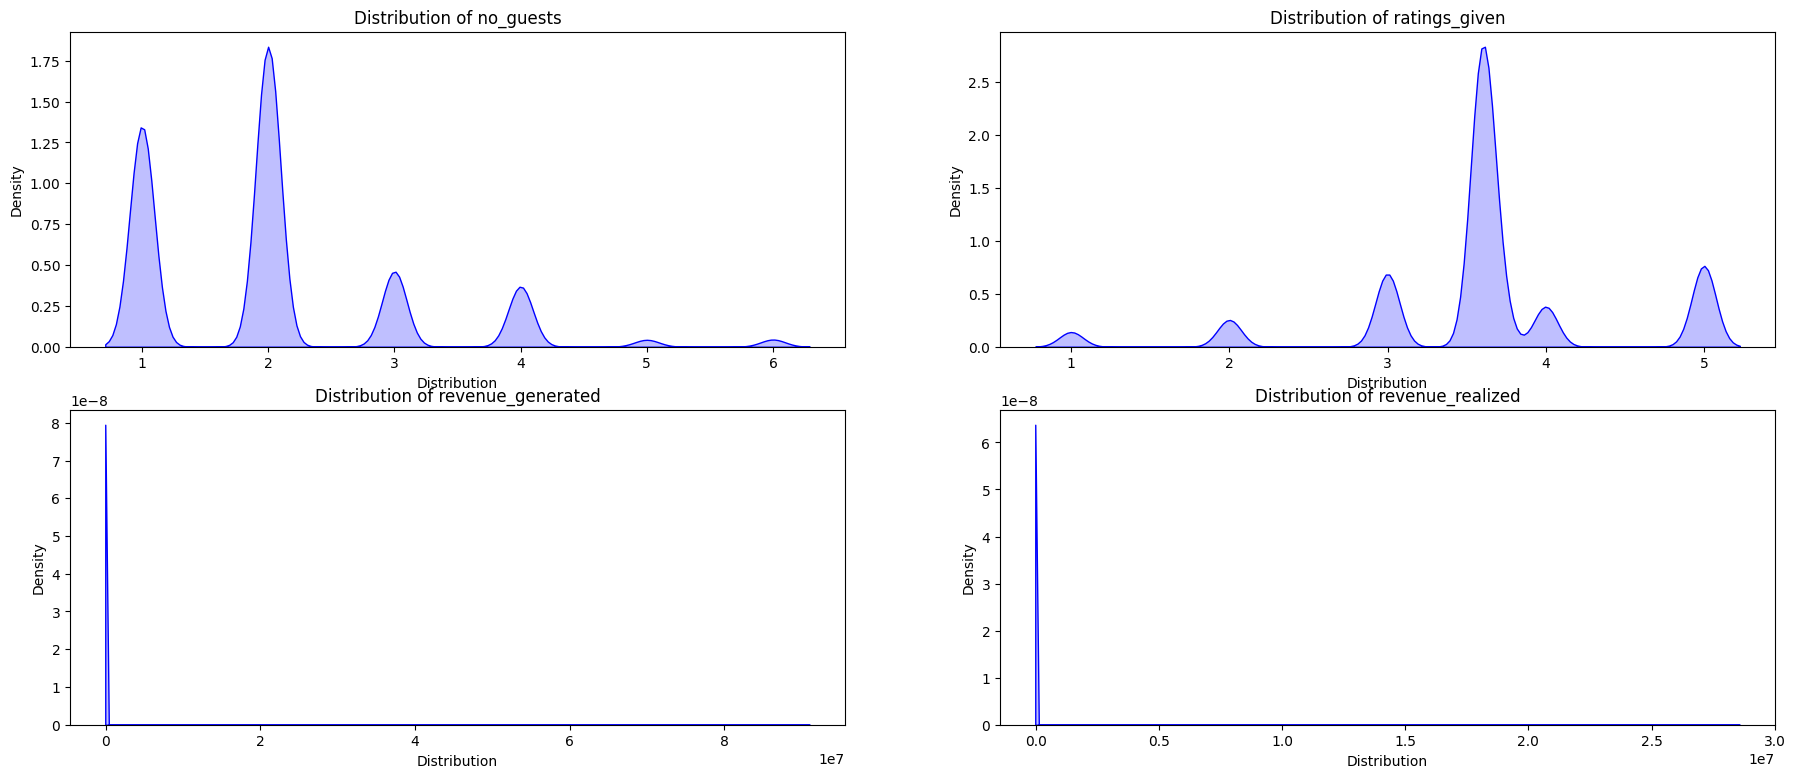

In [55]:
# Before removing ouliers lets check the distribution of the features.

columns = ['no_guests','ratings_given','revenue_generated','revenue_realized']
 
fig,axes = plt.subplots(2,2,figsize=(22,9))
axes = axes.flatten()

for i,col in enumerate(columns):
    ax = sns.kdeplot(x=col,data=df_bookings,color='blue',fill=True,ax=axes[i])
    axes[i].set_xlabel('Distribution')
    axes[i].set_ylabel('Density')
    axes[i].set_title(f'Distribution of {col}')

plt.show()

In [56]:
 # Removing Outliers for Rating Given using z-score.

df_bookings['z_score'] = (df_bookings['ratings_given'] - df_bookings['ratings_given'].mean()) / df_bookings['ratings_given'].std()
df_bookings[df_bookings['z_score'] > 3][['ratings_given','z_score']]
# No-Outliers Present

,ratings_given,z_score


In [57]:
df_bookings.drop('z_score',axis=1,inplace=True)

In [58]:
 # Removing Outliers for no_guests using 3 sigma rule

mean = df_bookings['no_guests'].mean()
three_step_std_deviation = round(mean + (df_bookings['no_guests'].std() * 3))
three_step_std_deviation

df_bookings = df_bookings.loc[df_bookings['no_guests']<=three_step_std_deviation]
df_bookings['no_guests'].value_counts()  # Outliers have been removed.

no_guests
2    60223
1    44313
3    15122
4    12096
5     1391
Name: count, dtype: int64

In [59]:
# Removing Outliers for revenue realized using 3 sigma rule
mean = df_bookings['revenue_realized'].mean()
three_step_std_deviation_upper_bound = round(mean + (df_bookings['revenue_realized'].std() * 3))
three_step_std_deviation_lower_bound = round(mean - (df_bookings['revenue_realized'].std() * 3))
three_step_std_deviation_lower_bound

df_bookings = df_bookings.loc[(df_bookings['revenue_realized'] >= three_step_std_deviation_lower_bound) | (df_bookings['revenue_realized'] <= three_step_std_deviation_upper_bound)]

In [60]:
# Removing Outliers for revenue generated

mean = df_bookings['revenue_generated'].mean()
three_step_std_deviation_upper_bound = round(mean + (df_bookings['revenue_generated'].std() * 3))
three_step_std_deviation_lower_bound = round(mean - (df_bookings['revenue_generated'].std() * 3))

df_bookings = df_bookings.loc[(df_bookings['revenue_generated'] >= three_step_std_deviation_lower_bound) & (df_bookings['revenue_generated'] <= three_step_std_deviation_upper_bound)]

In [61]:
df_bookings['revenue_generated'].max()

np.int64(41990)

# Exploratary Data Analysis

# Which hotel category (Luxury vs. Business) has the highest occupancy rate over the given period?

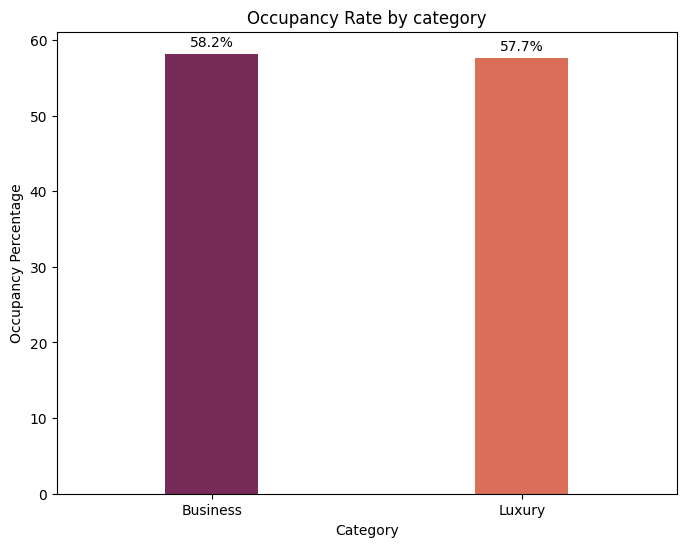

In [62]:
Occupancy_rate = pd.merge(df_aggregated_bookings,df_hotels,left_on='property_id',right_on='property_id',how='inner')
Occupancy_rate = Occupancy_rate.groupby('category').agg(
    successful_bookings_sum = ('successful_bookings','sum'),
    capacity_sum = ('capacity','sum')
)

Occupancy_rate['Occupancy_percentage'] = round((Occupancy_rate['successful_bookings_sum'] / Occupancy_rate['capacity_sum']) *100,2)
Occupancy_rate = Occupancy_rate['Occupancy_percentage'].reset_index()

# Creating Bar-Plot
plt.figure(figsize=(8,6))

ax = sns.barplot(x='category',y='Occupancy_percentage',data=Occupancy_rate,palette='rocket',hue='category',width=0.3)

# Adding Data-labels
for bars in ax.containers:
    ax.bar_label(bars,fmt='%.1f%%',label_type='edge',padding=3)

plt.xlabel('Category')  
plt.ylabel('Occupancy Percentage')  
plt.title('Occupancy Rate by category')

plt.grid(visible=False)
plt.show()

Both the hotel category Business and Luxury has similar occupancy rate with Business category having 58.4% OR and Luxury category having 57.7%.

# How does occupancy rate vary across different cities?

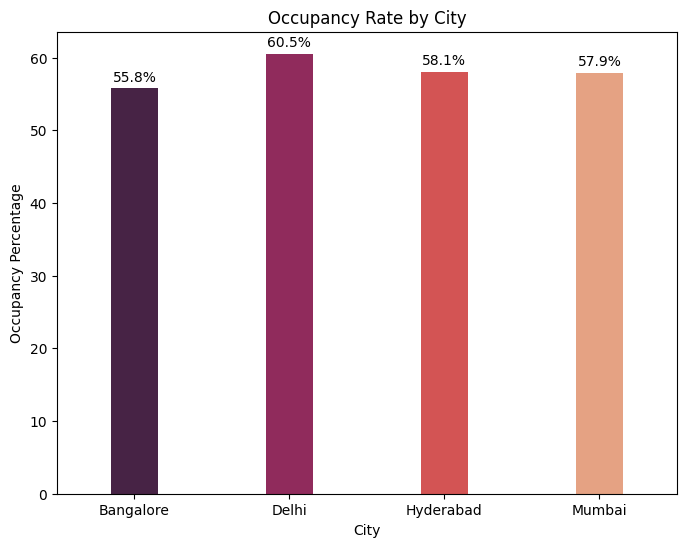

In [63]:
Occupancy_rate_cities = pd.merge(df_aggregated_bookings,df_hotels,left_on='property_id',right_on='property_id',how='inner')
Occupancy_rate_cities = Occupancy_rate_cities.groupby('city').agg(
    succesful_bookings_sum = ('successful_bookings','sum'),
    capacity_sum = ('capacity','sum')
)
Occupancy_rate_cities['occupancy_percentage'] = round((Occupancy_rate_cities['succesful_bookings_sum'] / Occupancy_rate_cities['capacity_sum'])*100,2)
Occupancy_rate_cities = Occupancy_rate_cities['occupancy_percentage'].reset_index()
Occupancy_rate_cities

# Creating Bar-Plot
plt.figure(figsize=(8,6))

ax = sns.barplot(x='city',y='occupancy_percentage',data=Occupancy_rate_cities,palette='rocket',hue='city',width=0.3)

# Adding Data-labels
for bars in ax.containers:
    ax.bar_label(bars,fmt='%.1f%%',label_type='edge',padding=3)

plt.xlabel('City')  
plt.ylabel('Occupancy Percentage')  
plt.title('Occupancy Rate by City')

plt.grid(visible=False)
plt.show()

Delhi has the highest Occupancy Rate of 60.7 % followed by Hyderabad , Mumbai and Bangalore.

# What is the average booking lead time (difference between booking date and check-in date) for different hotel categories?

In [64]:
bookings_lead_time = pd.merge(df_bookings,df_hotels,right_on='property_id',left_on='property_id',how='inner')
bookings_lead_time['lead_time'] =  bookings_lead_time['check_in_date'] - bookings_lead_time['booking_date']

avg_booking_lead_time = bookings_lead_time.groupby('category')['lead_time'].mean().reset_index()
avg_booking_lead_time['lead_time'] = avg_booking_lead_time['lead_time'].dt.days
avg_booking_lead_time

,category,lead_time
0,Business,2
1,Luxury,4


The average lead time of Business Category is 2 days and Luxury Category is 4 days.

# Which room category (RT1, RT2, RT3, RT4) is the most booked across all hotels?

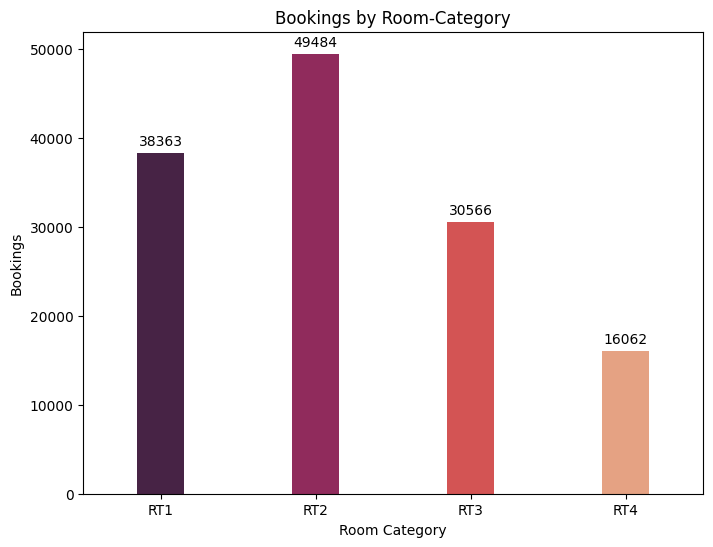

In [65]:
most_booked_room_category = df_aggregated_bookings.groupby('room_category')['successful_bookings'].sum().reset_index()

# Creating Bar plot.

plt.figure(figsize=(8,6))
ax = sns.barplot(x='room_category',y='successful_bookings',data=most_booked_room_category,palette='rocket',hue='room_category',width=0.3)
for bar in ax.containers:
    ax.bar_label(bar,padding=3)
    
plt.xlabel('Room Category')
plt.ylabel('Bookings')
plt.title('Bookings by Room-Category')

plt.grid(visible=False)
plt.show()


RT2 room category is most booked room category among other room category and RT4 is the least booked room category.

# How does the Weekend vs Weekday booking pattern vary across hotel categories?

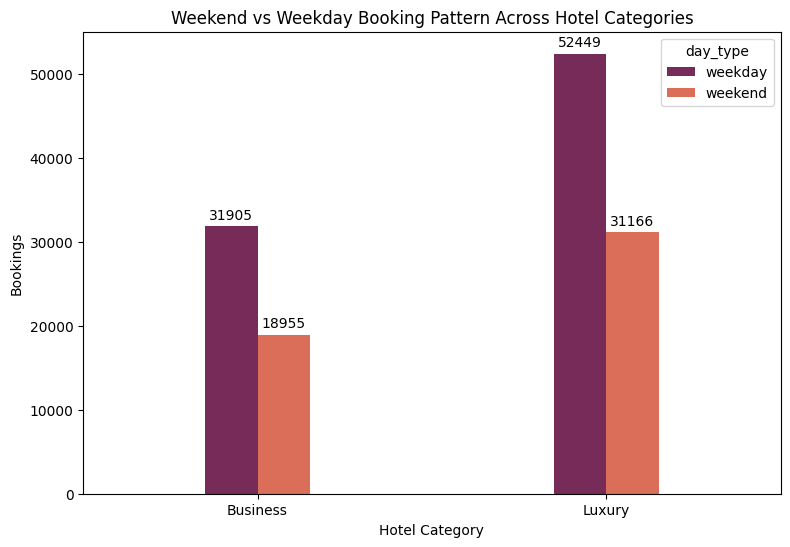

In [66]:
WendvsWday_booking_pattern = pd.merge(df_aggregated_bookings,df_date,left_on='check_in_date',right_on='date',how='inner')
WendvsWday_booking_pattern = pd.merge(WendvsWday_booking_pattern,df_hotels,left_on='property_id',right_on='property_id',how='inner')
WendvsWday_booking_pattern = WendvsWday_booking_pattern[['property_id','successful_bookings','day_type','category']]

bookings = WendvsWday_booking_pattern.groupby(['day_type','category'])['successful_bookings'].sum().reset_index()

plt.figure(figsize=(9,6))

ax = sns.barplot(data=bookings, x='category', y='successful_bookings', hue='day_type',palette='rocket',width=0.3)
for bar in ax.containers:
    ax.bar_label(bar,padding=3)

plt.xlabel('Hotel Category')
plt.ylabel('Bookings')
plt.title('Weekend vs Weekday Booking Pattern Across Hotel Categories')
plt.show()



In both the Business and Luxury hotel category bookings in Weekday is comparatively higher than Weekend.

# How often do hotels operate at full capacity?

C:\Users\Asus\AppData\Local\Temp\ipykernel_12476\2709583708.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aggregated_bookings['diff'] = df_aggregated_bookings['capacity'] - df_aggregated_bookings['successful_bookings']


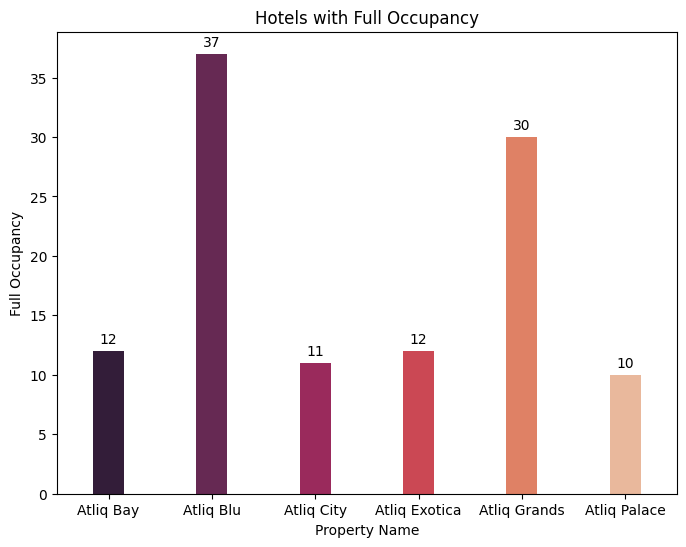

In [67]:
df_aggregated_bookings['diff'] = df_aggregated_bookings['capacity'] - df_aggregated_bookings['successful_bookings']
df_aggregated_bookings


hotel_full_capacity = pd.merge(df_aggregated_bookings,df_hotels,on='property_id',how='inner')
hotel_full_capacity = hotel_full_capacity[hotel_full_capacity['diff']==0].groupby('property_name').size().reset_index(name='full_capacity')
hotel_full_capacity

plt.figure(figsize=(8,6))

ax = sns.barplot(x='property_name',y='full_capacity',data=hotel_full_capacity,palette='rocket',hue='property_name',width=0.3)
for bar in ax.containers:
    ax.bar_label(bar,padding=3)

plt.xlabel('Property Name')
plt.ylabel('Full Occupancy')
plt.title('Hotels with Full Occupancy')

plt.show()

AtliQ Blu and AtliQ Grands are the two hotels which had highest Full Occupancy of 37 and 30 times respectively.


# Are premium rooms (Elite, Premium, Presidential) underutilized compared to standard rooms?

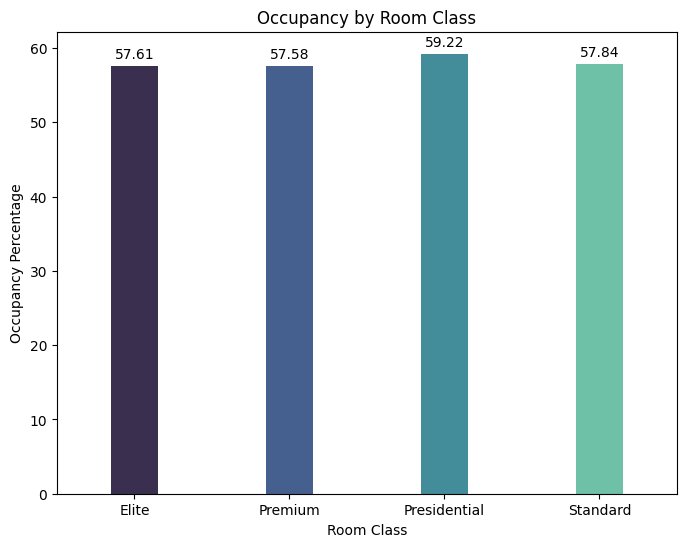

In [68]:
Occupancy_rate_roomclass = pd.merge(df_aggregated_bookings,df_rooms,left_on='room_category',right_on='room_id',how='inner')
Occupancy_rate_roomclass =  Occupancy_rate_roomclass.groupby('room_class').agg(
    successful_bookings_sum = ('successful_bookings','sum'),
    capacity_sum= ('capacity','sum')
).reset_index()

Occupancy_rate_roomclass['occupancy%'] = round((Occupancy_rate_roomclass['successful_bookings_sum'] / Occupancy_rate_roomclass['capacity_sum'])*100,2)
Occupancy_rate_roomclass

plt.figure(figsize=(8,6))
ax = sns.barplot(x='room_class',y='occupancy%',data=Occupancy_rate_roomclass,palette='mako',hue='room_class',width=0.3)
for bar in ax.containers:
    ax.bar_label(bar,padding=3)
    
plt.xlabel('Room Class')
plt.ylabel('Occupancy Percentage')
plt.title('Occupancy by Room Class')

plt.grid(visible=False)
plt.show()



All of the rooms is being utilized equally.

# What is the total revenue generated vs. revenue realized across different hotels?

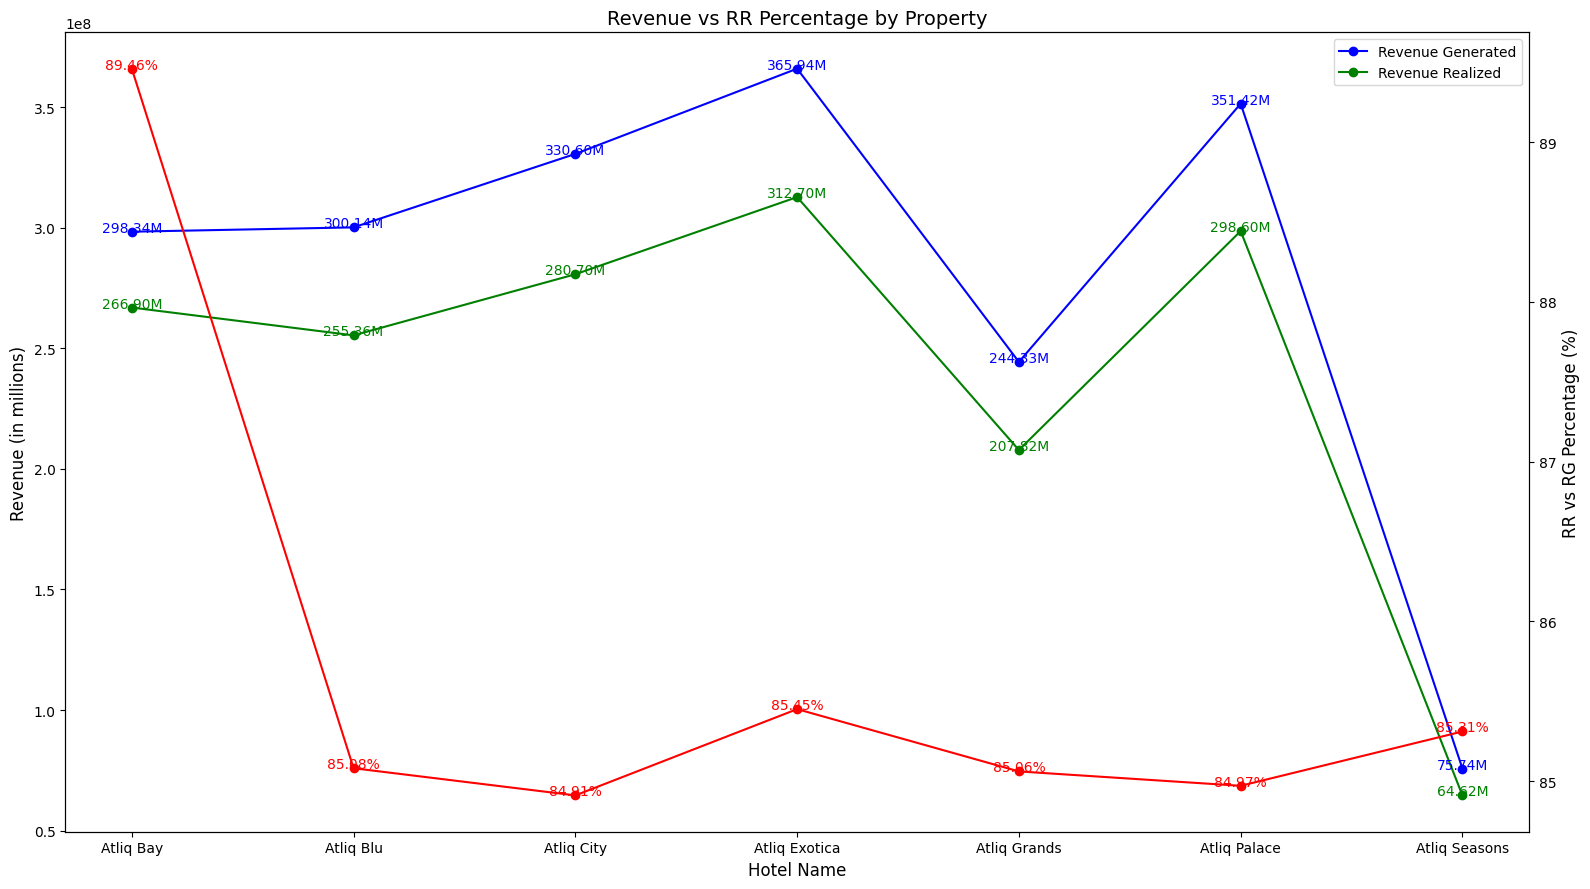

In [69]:
revenue_df = pd.merge(df_bookings, df_hotels, on='property_id', how='inner')
revenue_df = revenue_df.groupby('property_name')[['revenue_generated', 'revenue_realized']].sum().reset_index()
revenue_df['RRvsRG_percentage'] = round((revenue_df['revenue_realized'] / revenue_df['revenue_generated'] * 100), 2)

fig, ax1 = plt.subplots(figsize=(16, 9))

# Ploting revenue_generated and revenue_realized on the primary y-axis
line_rg = ax1.plot(revenue_df['property_name'], revenue_df['revenue_generated'], marker='o', linestyle='-', label='Revenue Generated', color='b')
line_rr = ax1.plot(revenue_df['property_name'], revenue_df['revenue_realized'], marker='o', linestyle='-', label='Revenue Realized', color='g')

# Adding data labels for the primary y-axis lines
for i, txt in enumerate(revenue_df['revenue_generated']):
    ax1.text(revenue_df['property_name'][i], revenue_df['revenue_generated'][i], f'{txt/1_000_000:.2f}M', color='b', ha='center')
for i, txt in enumerate(revenue_df['revenue_realized']):
    ax1.text(revenue_df['property_name'][i], revenue_df['revenue_realized'][i], f'{txt/1_000_000:.2f}M', color='g', ha='center')

# Creating the secondary y-axis for the percentage line
ax2 = ax1.twinx()

# Ploting RRvsRG_percentage on the secondary y-axis
line_rr_vs_rg = ax2.plot(revenue_df['property_name'], revenue_df['RRvsRG_percentage'], marker='o', linestyle='-', label='RR vs RG Percentage', color='r')

# Adding data labels for the percentage line
for i, txt in enumerate(revenue_df['RRvsRG_percentage']):
    ax2.text(revenue_df['property_name'][i], revenue_df['RRvsRG_percentage'][i], f'{txt:.2f}%', color='r', ha='center')

# Adding labels and title
plt.title('Revenue vs RR Percentage by Property', fontsize=14)
ax1.set_xlabel('Hotel Name', fontsize=12)
ax1.set_ylabel('Revenue (in millions)', fontsize=12)
ax2.set_ylabel('RR vs RG Percentage (%)', fontsize=12)

# Adding legends for both y-axes
ax1.legend(loc='upper right')

plt.tight_layout()
plt.show()


Almost in every hotel the revenue realized ranges between 85 - 90 % of the revenue genrated.

# Which hotel has the highest revenue leakage due to cancellations?

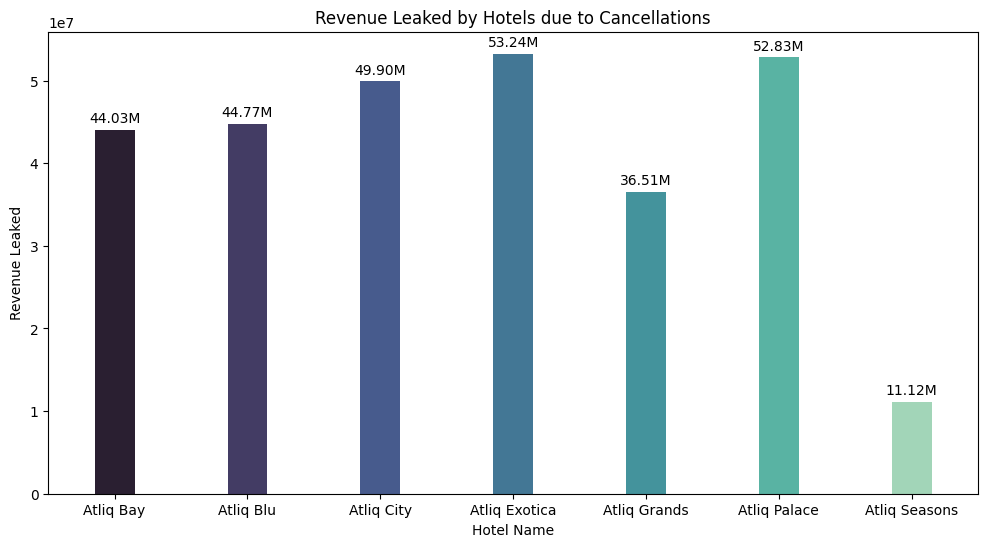

In [70]:
# Filtering data based on the booking status which is Cancelled
cancelled_bookings_df = df_bookings[df_bookings['booking_status']=='Cancelled']

# Joining the data frames.  
cancelled_bookings_revenue = pd.merge(cancelled_bookings_df,df_hotels,on='property_id',how='inner')
cancelled_bookings_revenue['revenue_leaked'] = cancelled_bookings_revenue['revenue_generated'] - cancelled_bookings_revenue['revenue_realized']

cancelled_bookings_revenue = cancelled_bookings_revenue.groupby('property_name')['revenue_leaked'].sum().reset_index()
cancelled_bookings_revenue

# Ploting the bar chart

plt.figure(figsize=(12,6))

ax = sns.barplot(x='property_name',y='revenue_leaked',data=cancelled_bookings_revenue,palette='mako',hue='property_name',width=0.3)
for bar in ax.containers:
    ax.bar_label(bar,fmt='{:.2f}M',labels=[f'{(v.get_height()*1e-6):.2f}M' for v in bar],padding=3)

plt.xlabel('Hotel Name')
plt.ylabel('Revenue Leaked')
plt.title('Revenue Leaked by Hotels due to Cancellations')

plt.show()

1. AtliQ Exotica and AtliQ Palace have lost highest revenue due to cancellations.
2. AtliQ Seasons have lost least revenue.

# What is the distribution of booking statuses (Checked Out, Cancelled, No Show) across different booking platforms?

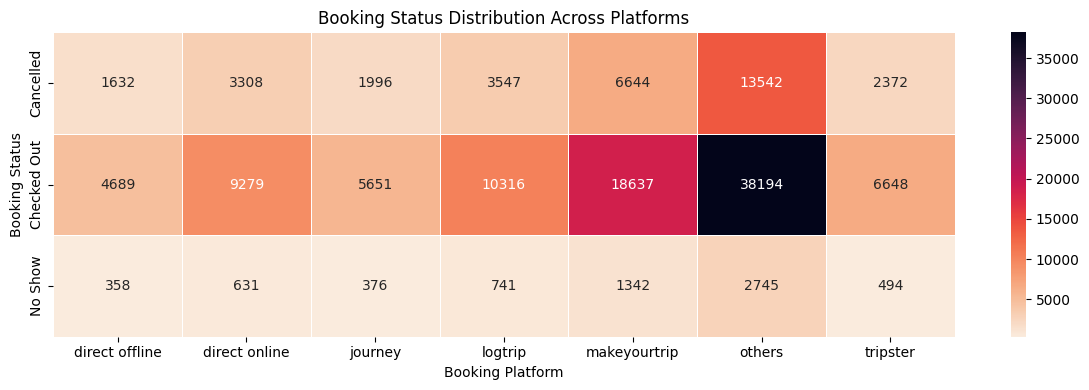

In [71]:
# Grouping data based on Booking Platform and Booking Status and calculating the counts
status_distribution = df_bookings.groupby(['booking_platform','booking_status']).size().reset_index(name='count')
status_distribution

status_distribution = status_distribution.pivot(index='booking_status',columns='booking_platform',values='count')
status_distribution

# Plotting the heatmap
plt.figure(figsize=(12, 4))
sns.heatmap(status_distribution, annot=True, cmap="rocket_r", fmt='g', cbar=True, linewidths=0.5)

# Adding labels and title
plt.title('Booking Status Distribution Across Platforms')
plt.xlabel('Booking Platform')
plt.ylabel('Booking Status')
plt.tight_layout()
plt.show()

Others booking plaform has most of the contribution in all booking status followed by makeyourtrip and logtrip.

# Is there any correlation between booking lead time and cancellation rate?

In [72]:
bookings = df_bookings

bookings['lead_time'] = (bookings['check_in_date'] - bookings['booking_date']).dt.days
bookings = bookings.groupby('lead_time').agg(
    total_bookings = ('booking_id','count'),
    cancelled_bookings = ('booking_id',lambda x: (x[bookings['booking_status']=='Cancelled']).count())
).reset_index()

bookings['cancellation_rate'] = round((bookings['cancelled_bookings'] / bookings['total_bookings'])*100,2)

# Coorelation of lead time and cancellation rate.

coorelation = bookings[['lead_time','cancellation_rate']].corr()
coorelation

,lead_time,cancellation_rate
lead_time,1.000000,0.066389
cancellation_rate,0.066389,1.000000


Text(0.5, 1.0, 'Lead time and Cancellation Rate Correlation')

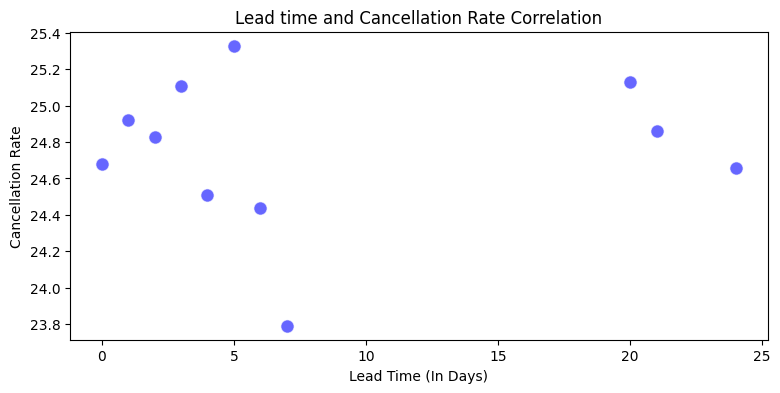

In [73]:
plt.figure(figsize=(9,4))

sns.scatterplot(x='lead_time',y='cancellation_rate',data=bookings,color='blue',alpha=0.6,s=90)
plt.xlabel('Lead Time (In Days)')
plt.ylabel('Cancellation Rate')
plt.title('Lead time and Cancellation Rate Correlation')

There is no correlation between lead time and cancellation rate. Cancellation rate is genrally same in every lead time.


# How do ratings given by customers differ across different hotel?

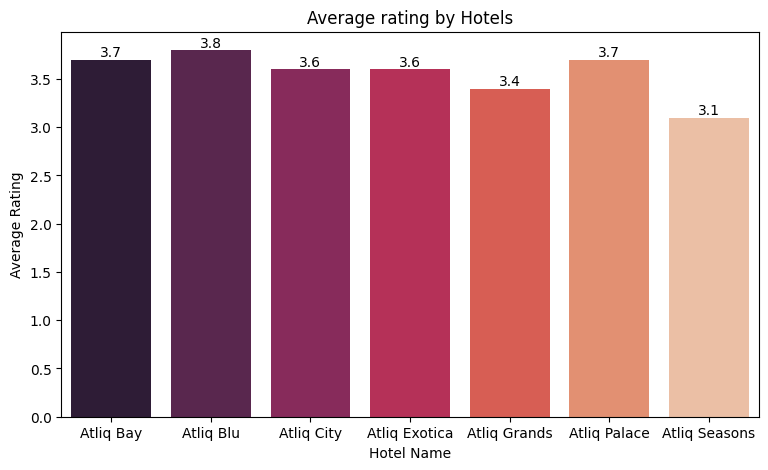

In [74]:
ratings_by_property = pd.merge(df_bookings,df_hotels,on='property_id',how='inner')
ratings_by_property = round(ratings_by_property.groupby('property_name')['ratings_given'].mean().reset_index(name='Average_Rating'),1)

plt.figure(figsize=(9,5))

ax = sns.barplot(x='property_name',y='Average_Rating',data=ratings_by_property,palette='rocket',hue='property_name')
for bars in ax.containers:
    ax.bar_label(bars)

plt.xlabel('Hotel Name')
plt.ylabel('Average Rating')
plt.title('Average rating by Hotels')

plt.show()


1. AtliQ Blue hotel has highest average rating of 3.8.
2. AtliQ Seasons hotel has lowest average rating of 3.1.

# Which Booking-Platform has generated highest Revenue ? 

In [75]:
highest_revenue_bp = df_bookings.groupby('booking_platform')['revenue_realized'].sum().reset_index()
highest_revenue_bp

,booking_platform,revenue_realized
0,direct offline,97167561
1,direct online,165075611
2,journey,100535942
3,logtrip,183766228
4,makeyourtrip,334191504
5,others,685640866
6,tripster,120322969


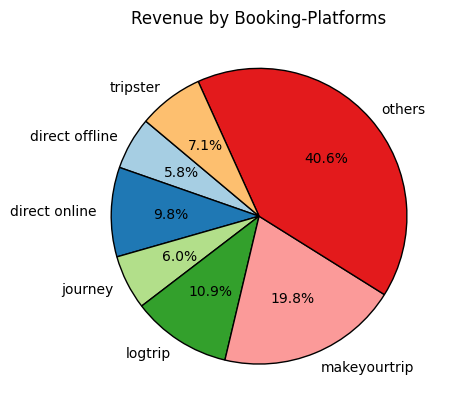

In [76]:
#setting a color paletee
colors = sns.color_palette('Paired', len(highest_revenue_bp))
# plotting a pie chart
plt.pie(highest_revenue_bp['revenue_realized'],labels=highest_revenue_bp['booking_platform'],autopct='%1.1f%%', startangle=140,colors=colors,wedgeprops={'edgecolor': 'black'})
plt.title('Revenue by Booking-Platforms')
plt.show()

1. Others booking platform has generated 40.6% of the revenue followed by makeyourtrip with 19.8%.
2. Tripster has generated the least with 7.1% of revenue out of total revenue.
    

# Which booking platform has the highest customer cancellation rate ?

In [77]:
cancelled_bookings_df

cancellation_rate_bp = cancelled_bookings_df.groupby('booking_platform')['booking_status'].size().reset_index(name='cancelled_count')
cancellation_rate_bp['percentage'] = round((cancellation_rate_bp['cancelled_count'] / cancellation_rate_bp['cancelled_count'].sum())*100,2)
cancellation_rate_bp.sort_values(by='percentage',ascending=False)

,booking_platform,cancelled_count,percentage
5,others,13542,40.99
4,makeyourtrip,6644,20.11
3,logtrip,3547,10.74
1,direct online,3308,10.01
6,tripster,2372,7.18
2,journey,1996,6.04
0,direct offline,1632,4.94


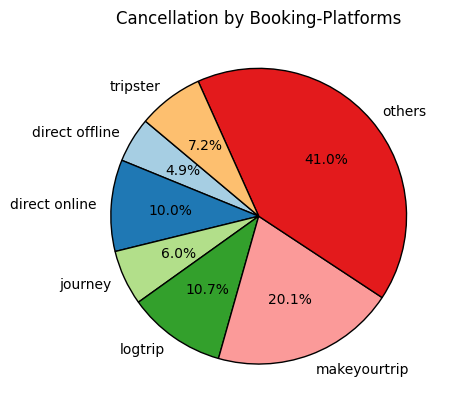

In [78]:
#setting a color paletee
colors = sns.color_palette('Paired', len(highest_revenue_bp))
# plotting a pie chart
plt.pie(cancellation_rate_bp['cancelled_count'],labels=cancellation_rate_bp['booking_platform'],autopct='%1.1f%%', startangle=140,colors=colors,wedgeprops={'edgecolor': 'black'})
plt.title('Cancellation by Booking-Platforms')
plt.show()

1. Others has highest cancellation rate of 41.0%.
2. Tripster has lowest cancellation reate of 7.2%.

# How does the average booking lead time differ across booking platforms ?

In [79]:
booking_lead_time_bp = round(df_bookings.groupby('booking_platform')['lead_time'].mean().reset_index())
booking_lead_time_bp

,booking_platform,lead_time
0,direct offline,4.0
1,direct online,4.0
2,journey,4.0
3,logtrip,4.0
4,makeyourtrip,4.0
5,others,4.0
6,tripster,4.0


Average booking lead time across all the platform is same of 4 days.

# What is the most popular booking platform for luxury hotels vs. business hotels ?

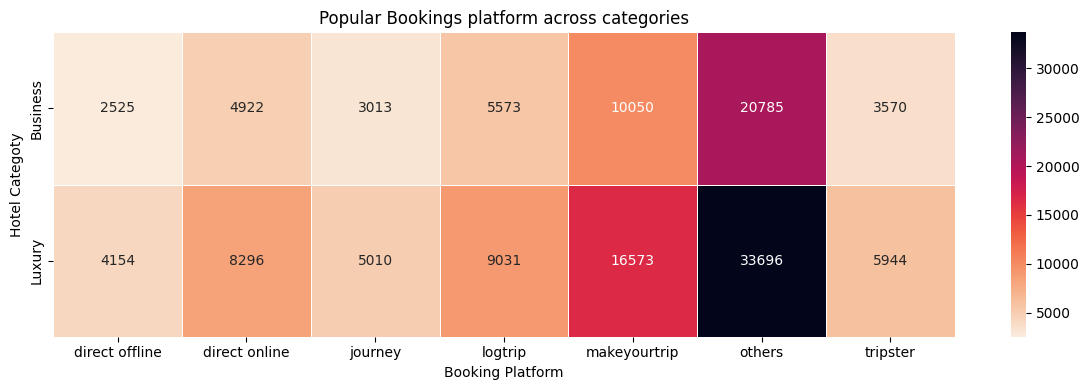

In [80]:
popular_bp_hotel_categories = pd.merge(df_bookings,df_hotels,on='property_id',how='inner')
popular_bp_hotel_categories = popular_bp_hotel_categories.groupby(['category','booking_platform']).size().reset_index(name='count')
popular_bp_hotel_categories1 = popular_bp_hotel_categories.pivot(index='category',columns='booking_platform',values='count')

# Plotting the heatmap
plt.figure(figsize=(12, 4))
sns.heatmap(popular_bp_hotel_categories1, annot=True, cmap="rocket_r", fmt='g', cbar=True, linewidths=0.5)

# Adding labels and title
plt.title('Popular Bookings platform across categories')
plt.xlabel('Booking Platform')
plt.ylabel('Hotel Categoty')
plt.tight_layout()
plt.show()

For both Luxury and Business category others booking platform is mostly used followed by makeyourtrip.